## 1 Data retrieving

This notebook extract data in for Russian-language newspapers issued in 1880s and 1917.
NB Data format: sections, not pages!

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(digar.txts, lib.loc = "~/R_pckg/")

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
all_issues <- get_digar_overview()
str(all_issues)

[1] "Issue metadata read"
Classes ‘data.table’ and 'data.frame':	403201 obs. of  60 variables:
 $ DocumentID           : chr  "AKabiline201710" "AKabiline201804" "AKacademiamilitaris202106" "AKagraarteadus201706" ...
 $ keyid                : chr  "AKabiline" "AKabiline" "AKacademiamilitaris" "AKagraarteadus" ...
 $ attrs                : int  1 2 1 1 2 3 4 5 6 7 ...
 $ DocumentDate         : chr  "oktoober 2017" "aprill 2018" "juuni 2021" "juuni 2017" ...
 $ DocumentTitle        : chr  "Abiline : [ajakiri]" "Abiline : [ajakiri]" "Academia Militaris : [Kaitseväe Akadeemia populaarteaduslik ajakiri]" "Agraarteadus = Journal of agricultural science : Akadeemilise Põllumajanduse Seltsi väljaann" ...
 $ DocumentType         : chr  "PERIODICAL" "PERIODICAL" "PERIODICAL" "PERIODICAL" ...
 $ series               : chr  "staging/all_pubs/all_vols_AKabiline.xml" "staging/all_pubs/all_vols_AKabiline.xml" "staging/all_pubs/all_vols_AKacademiamilitaris.xml" "staging/all_pubs/all_vols_AKagraarteadu

In [5]:
# subset Russian newspapers
rus_subset <- all_issues %>% 
    filter(language == "Russian") 

rus_subset %>% 
    filter(year < 1918) %>%
    filter(sections_exist == TRUE) %>% 
    select(keyid) %>% 
    distinct

# subset metadata
subset_meta <- get_subset_meta(rus_subset, source = "sections")

keyid
<chr>
ekmteataja
livzeitung


Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc566206cabb' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc5642773a2e' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc56318cbd8c' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc56705155bc' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc5669f4695' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc5678d4b84f' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpUg2q9h/file3cc5627da80c' has size 0. Returning a NULL data.table.”


In [7]:
# extract sections for the 1917 newspapers in Russian
subset_meta_1917 <- subset_meta %>% 
    filter(year == 1917)

subset_meta_1917 %>% 
    mutate(title = str_remove_all(docid, "\\d+")) %>% 
    select(title) %>% 
    distinct

title
<chr>
ekmteataja


**!!!
Newspapers issued in 1917 in Russian are not provided with section division**

**Quick check for which newspapers section division is available**

In [8]:
# filter metadata for all pre-revolutionary newspapers
prerevol <- subset_meta %>% 
    filter(year < 1918)

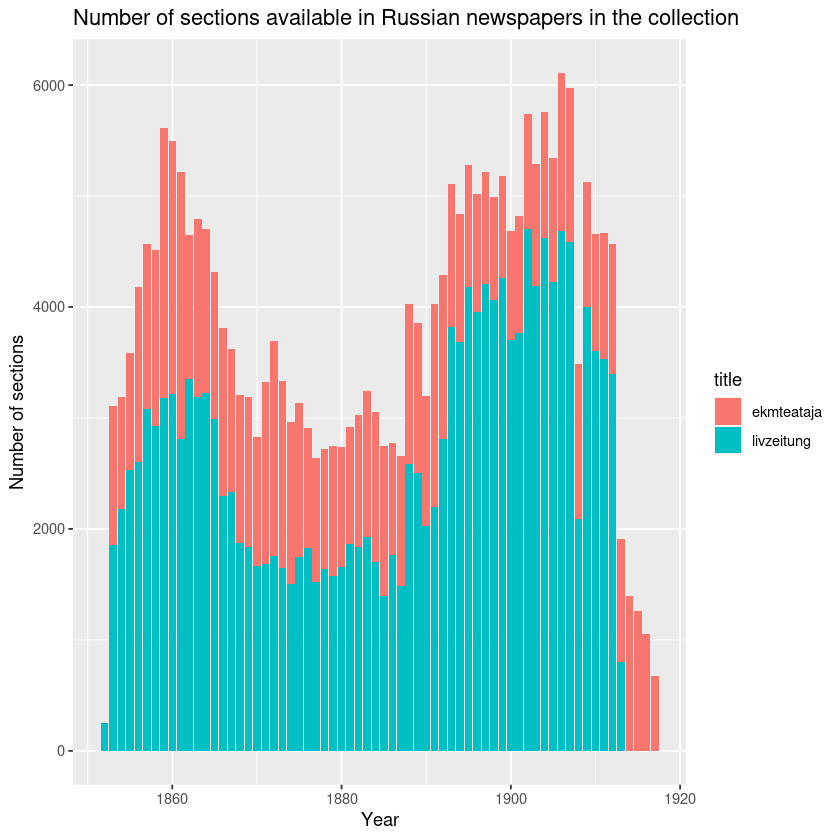

In [9]:
prerevol %>% 
    mutate(title = str_remove_all(docid, "\\d+")) %>% 
    group_by(title, year) %>% 
    count() %>% 
    ggplot(aes(x = year, y = n, fill = title)) + geom_col() + 
    labs(x = "Year", y = "Number of sections", title = "Number of sections available in Russian newspapers in the collection")

### Texts extraction
#### All pre-revolutionary sections from Est. and Liv. governorate newspapers

In [12]:
str(prerevol)

Classes ‘data.table’ and 'data.frame':	252993 obs. of  17 variables:
 $ .id                               : int  31 31 31 31 31 31 31 31 31 31 ...
 $ docid                             : chr  "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" ...
 $ LogicalSectionFirstPageID         : chr  "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" ...
 $ LogicalSectionID                  : chr  "ekmteataja18530105.2.1" "ekmteataja18530105.2.2" "ekmteataja18530105.2.3" "ekmteataja18530105.2.4" ...
 $ attrs                             : int  1 2 3 4 6 7 8 9 10 11 ...
 $ LogicalSectionTitle               : chr  "Kopfleiste" "I. Отделъ общий." "I. Allgemeine Abtheilung." "II. Местный Отделъ. II. Oertliche Abtheilung." ...
 $ LogicalSectionType                : chr  "TITLE_SECTION+ILLUSTRATION" "ARTICLE" "ARTICLE" "SECTION" ...
 $ LogicalSectionViewURL             : chr  "/cgi-bin/dea?a=d&d=ekmteataja18530105.2.1" "/cg

* Texts will be retrieved with the `do_subset_seatch()` that needs full metadata for each issue
* Code below joins all the metadata fields, avoiding doubling the Year column
* As issue metadata table has *DocumentID* instead of *docid*, it is added in the second pipe
* resulting table used to write all sections texts to the file `prerevol_sections.txt`

In [53]:
tt <- left_join(prerevol %>% select(-year), rus_subset %>% mutate(docid = DocumentID), by = "docid")
str(tt)

Classes ‘data.table’ and 'data.frame':	252993 obs. of  76 variables:
 $ .id                               : int  31 31 31 31 31 31 31 31 31 31 ...
 $ docid                             : chr  "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" "ekmteataja18530105" ...
 $ LogicalSectionFirstPageID         : chr  "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" "ekmteataja18530105.1.1" ...
 $ LogicalSectionID                  : chr  "ekmteataja18530105.2.1" "ekmteataja18530105.2.2" "ekmteataja18530105.2.3" "ekmteataja18530105.2.4" ...
 $ attrs.x                           : int  1 2 3 4 6 7 8 9 10 11 ...
 $ LogicalSectionTitle               : chr  "Kopfleiste" "I. Отделъ общий." "I. Allgemeine Abtheilung." "II. Местный Отделъ. II. Oertliche Abtheilung." ...
 $ LogicalSectionType                : chr  "TITLE_SECTION+ILLUSTRATION" "ARTICLE" "ARTICLE" "SECTION" ...
 $ LogicalSectionViewURL             : chr  "/cgi-bin/dea?a=d&d=ekmteataja18530105.2.1" "/cg

In [54]:
do_subset_search(searchterm = "", searchfile = "data/prerevol_sections.txt", 
                 subset = tt, source = "sections", searchtype = "text")

In [58]:
texts <- tibble(text = readLines("data/prerevol_sections.txt"),
               section_id = str_extract(text, "^.*[[:space:]]<p>"))

In [59]:
head(texts, 10)

text,section_id
<chr>,<chr>
Archive: /gpfs/space/projects/digar_txt/text/text_sections/ekmteataja/ekmteataja_1853_sections.zip,NA
extracting: ekmteataja/1853/1/,NA
,NA
inflating: ekmteataja/1853/1/ekmteataja18530105.2.1,NA
@@@@@_NationalLibraryofEstonia_DigitalCollectionsData_SeeUsageRights_in_data.digar.ee_@@@@@,NA
"ekmteataja18530105.2.1 <p>Эстляндские губернские ведомости</p><p>Издаются еженедsжио по Понсдъльпикамъ Щ,l&gt;ва въ годъ 3 руб. сер., для части ыхъ лнцъ въ г. Ревель съ доставкою въ домъ 5 руб. 25 коп.еещ и с* пересылкою по почтъ 4 руб. 50 коп&gt; сер. Подписка ириаимаетсд въ Губернском» Нрав® жат , въ Губернской Почтовой Контор® н лъ Церковномъ доми Церкви Св. Духа иодъ &lt;М 278. Объявлен 1я для нрниечаташя прижимаются въ озиачеппомъ Церковномъ дом-ь но Четвергамт» ; » по Пяпжцамъ не позже Э часовъ утр». Объявлевдя для припечаташя должны быть снабжены подписью прислав» шаг© или отдавшею нхъ.</p><p>Estländische Gouvernements-Zeitung</p><p>Die Seitung erscheint Montags. Der Preis derselben beträgt 3 Rbl. S.; für Privatpersonen in Reval, mit Zustellung in'S Haus, 8 Rbl. 25 K. S., mit Versendung durch die Post 4 Rbl. 60 K. S Bestellungen auf dieselbe werden in der Gouvernements» Regierung, im Gouvernements-Post-Comptoir und im Hause der heiligen GeistKirche Ж 278 angenommen; in dem letztern findet auch die Annahme der Inserate statt, die jeden DonnerStag bis Freitag Morgens, spätestens 9 Uhr, währt. Die Inserate sind mir der .Unterschrift des Einsenders oder AbgeberS derselben zu versehen.</p><p>1 5. Января.</p><p>Montag, den 5. Januar. 1853»</p>",ekmteataja18530105.2.1 <p>
inflating: ekmteataja/1853/1/ekmteataja18530105.2.2,NA
@@@@@_NationalLibraryofEstonia_DigitalCollectionsData_SeeUsageRights_in_data.digar.ee_@@@@@,NA
"ekmteataja18530105.2.2 <p>I. Отделъ общий.</p><p>На основанш 161 §. приложешя къ 648 ст VI продолжен!» 2. тома Свода Закон овъ , распространен наго Вмсочайшимъ Указомъ огь 13 / 25 Маш 1852 года и на oсгзейскlл Губсрнш , Эстляндское Губернское Правлеме просить веl&gt; Губернскlя в Областныя Правлешя, присылающая въ €Л""""Ьдствlе прежняго ' порядка делопроизводства еще но одному экземпляру еысквыхъ статей , дабы благоволили впредь доставлять въ cie -Правлеше означенныя статьи въ предписанномъ числl» экземпляровь.</p><p>Вице - Губернаторъ Баро нть Розеиъ. Старшш Секретарь Э, ФОНЪ Нотбекъ.</p>",ekmteataja18530105.2.2 <p>


In [61]:
# fast cleaning
texts <- texts %>% 
    # remove rows with no text
    filter(!is.na(section_id)) %>% 
    # remove <p> from section id
    mutate(section_id = str_remove_all(section_id, "\\t|<p>|[[:space:]]")) %>% 
    # remove section id from text
    mutate(text = str_remove(text, "^.*[[:space:]]<p>")) %>%
    select(section_id, text) %>%
    # remove tags from texts
    mutate(text = str_replace_all(text, "<p>|</p>|<gr>|</gr>", " "))

head(texts, 5)

section_id,text
<chr>,<chr>
ekmteataja18530105.2.1,"Эстляндские губернские ведомости Издаются еженедsжио по Понсдъльпикамъ Щ,l&gt;ва въ годъ 3 руб. сер., для части ыхъ лнцъ въ г. Ревель съ доставкою въ домъ 5 руб. 25 коп.еещ и с* пересылкою по почтъ 4 руб. 50 коп&gt; сер. Подписка ириаимаетсд въ Губернском» Нрав® жат , въ Губернской Почтовой Контор® н лъ Церковномъ доми Церкви Св. Духа иодъ &lt;М 278. Объявлен 1я для нрниечаташя прижимаются въ озиачеппомъ Церковномъ дом-ь но Четвергамт» ; » по Пяпжцамъ не позже Э часовъ утр». Объявлевдя для припечаташя должны быть снабжены подписью прислав» шаг© или отдавшею нхъ. Estländische Gouvernements-Zeitung Die Seitung erscheint Montags. Der Preis derselben beträgt 3 Rbl. S.; für Privatpersonen in Reval, mit Zustellung in'S Haus, 8 Rbl. 25 K. S., mit Versendung durch die Post 4 Rbl. 60 K. S Bestellungen auf dieselbe werden in der Gouvernements» Regierung, im Gouvernements-Post-Comptoir und im Hause der heiligen GeistKirche Ж 278 angenommen; in dem letztern findet auch die Annahme der Inserate statt, die jeden DonnerStag bis Freitag Morgens, spätestens 9 Uhr, währt. Die Inserate sind mir der .Unterschrift des Einsenders oder AbgeberS derselben zu versehen. 1 5. Января. Montag, den 5. Januar. 1853»"
ekmteataja18530105.2.2,"I. Отделъ общий. На основанш 161 §. приложешя къ 648 ст VI продолжен!» 2. тома Свода Закон овъ , распространен наго Вмсочайшимъ Указомъ огь 13 / 25 Маш 1852 года и на oсгзейскlл Губсрнш , Эстляндское Губернское Правлеме просить веl&gt; Губернскlя в Областныя Правлешя, присылающая въ €Л""""Ьдствlе прежняго ' порядка делопроизводства еще но одному экземпляру еысквыхъ статей , дабы благоволили впредь доставлять въ cie -Правлеше означенныя статьи въ предписанномъ числl» экземпляровь. Вице - Губернаторъ Баро нть Розеиъ. Старшш Секретарь Э, ФОНЪ Нотбекъ."
ekmteataja18530105.2.3,"I. Allgemeine Abtheilung. Nach Grundlage des 161. §. der Beilage zum 648. Artikel der VI. Fortsetzung des 2. Baüdes des Codex, welche mittelst Allerhöchsten Males vom Mai 1852 auch auf die Ostsee-Gou-vernements ausgedehnt worden, ersucht die Ehstländische Gouvernements-Regierung alle Gouvts - und Gebiets-Regierungen, welche noch nach der frühern Geschäftsordnung zu einem Exemplar von jedem Ausfindigmachungsartikel hierher einsenden, daß selbige geliehen mögen, solche Ausfindigmachungsartikel in 'der vorgeschriebenen Anzahl von Exemplaren dieser Gouvernements - Re« gierung zukommen zu lassen. Vice-Gouverneur Baron Rosen. Aelterer Secretär E. v. Nottbeck."
ekmteataja18530105.2.4,II. Местный Отделъ. II. Oertliche Abtheilung.
ekmteataja18530105.2.4.1,"I. ОФФИЦИАЛЬНАЯ ЧАСТЬ. По именному ЕГО ИМИ ЕРАТОРСК АГО ВЕЛИЧЕСТВА Высочайшему указу, данному Правительствующему Сенату сего Ноября въ Ъ день, за Собственноручеымъ ЕГО ВЕЛЙЧЕСТВА подписашемъ, въ которомъ изображено : „Ея Императорскому Высочеству, Любезнейшей Дочери НАШЕЙ, Великой Княгине Mapi и Николаев e-fe, ПовелЪваемъ быть Президеитомъ ИМПЕРАТОРСКОЙ Академш Художествъ"""" Правишельсшвующш Сенатъ Приказали : Объ изъясненномъ Бысочайшемъ ЕГО ИМПЕРАТОРСКАГО ВЕЛИЧЕСТВА повелЪнш во вс® Губернсвдя , Войсковыя и Обласшыыя 11равлев1я послать указы, &gt; каковыми уведомить . Гг. , Министровъ и Главноуправляющихъ отдельными частями и Начальников!» губернш; а въ • СвятЪйшш Правительсгпвующш ■ СУНОДЪ, во всЬ Департаменты Правитель--сшвующаго Сената и Обпця опыхъ Собра- шя сообишть вЪд-Ьшя ; уведомлен ie же о семъ Гг. Министровъ ЙМIIЕРАТОРСКАГО Двора и УдЬловъ у управляющего Кабинетоиъ ЕГО : ИМПЕРАТОРСКАГО ВЁЛИЧЕСТА предоставить Г. Министру Юсшищи, для чего въДепартамеегаъ Министерства Юсгаицш сообщить котю съ oripeдЪлгшя и публиковать въ Сенатскнхъ ВФдомостяхъ. Ноябри 6 дня 1852 года* По указу ЕГО ИМПКРАТОРСКАГО ВЕЛИЧЕСТВА, Правительствудощш Сенатъ слушали рапоршъ Г. Управляющего Военнымъ Миниетеретвомъ, ошъ 13 Октября 1852 года, aa JW 11773-мъ, въ коемъ изъясняешъ, что ГОСУДАРЬ ИМПЕРАТОРЪ Высочайше повелеть соизволилъ npiемъ на службу дворянъ и вольноопределяющихся

In [62]:
# save data
write.csv(file = "data/prerevol_texts_sections.csv", texts)

In [11]:
# save metadata separately
write.csv(file = "data/prerevol_meta_sections.csv", prerevol)